# Introduction

Here 4 Linear Regression Models are used on a simple iris dataset.the intention is to show how predictions differ by each model

Ordinary Least Squared Model - base::stats package  
Lasso Model (L1 Regularization) - glmnet (α=1) package  
Ridge Model (L2 Regularization)- glmnet (α=0) package  
Elastinet Model ((L1+L2 Regularization)) - glmnet (e.g: α=0.5) package  

In [162]:
#load required libraries
library(ggplot2)
library(GGally)
library(Matrix)
library(foreach)
library(glmnet)

## 1. Understanding the dataset

In [163]:
#read a summary of structure
str(iris)


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [164]:
#Sample some data
head(iris,n=5)
tail(iris,n=5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
146,6.7,3,5.2,2.3,virginica
147,6.3,2.5,5,1.9,virginica
148,6.5,3,5.2,2,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3,5.1,1.8,virginica


Warning message:
In loop_apply(n, do.ply): position_stack requires constant width: output may be incorrectWarning message:
In loop_apply(n, do.ply): position_stack requires constant width: output may be incorrectWarning message:
In loop_apply(n, do.ply): position_stack requires constant width: output may be incorrect

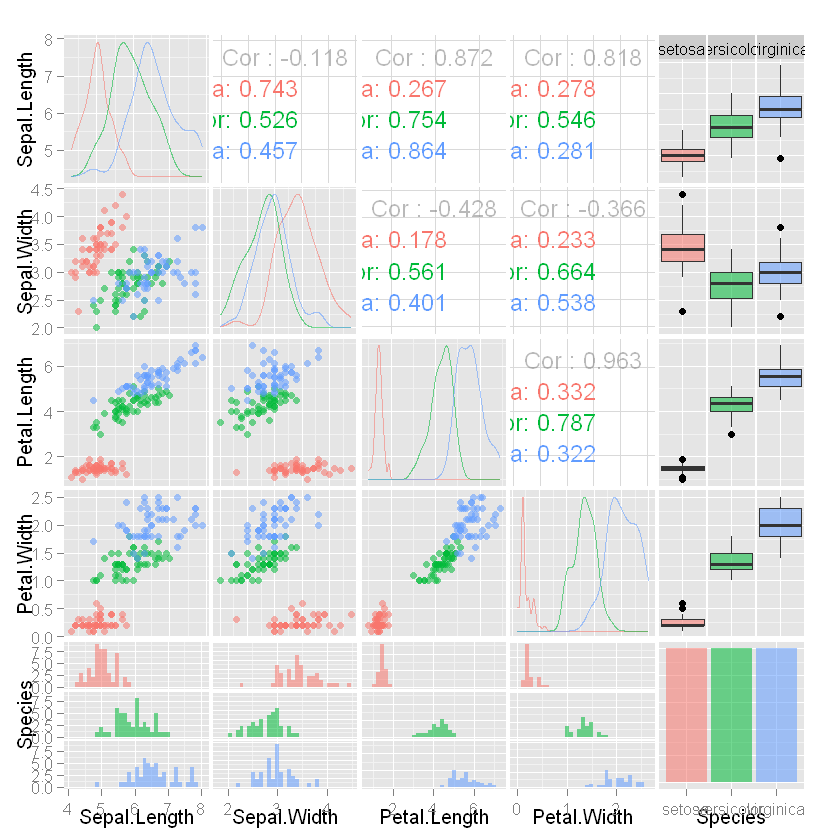

In [165]:
##Plot the datset
ggpairs(iris, colour='Species', alpha=0.4)

In [166]:
## 70% of the sample size
smp_size <- floor(0.70 * nrow(iris))

## set the seed to make your partition reproductible
set.seed(123)
train_ind <- sample(seq_len(nrow(iris)), size = smp_size)

train <- iris[train_ind, ]
test <- iris[-train_ind, ]

In [167]:
#read structrue of training  and test sets
str(train)
str(test)

'data.frame':	105 obs. of  5 variables:
 $ Sepal.Length: num  5 7.7 5 7.2 6.4 4.6 6.8 6.1 6 5.6 ...
 $ Sepal.Width : num  3.5 3.8 2 3 3.1 3.4 2.8 3 2.9 2.9 ...
 $ Petal.Length: num  1.6 6.7 3.5 5.8 5.5 1.4 4.8 4.9 4.5 3.6 ...
 $ Petal.Width : num  0.6 2.2 1 1.6 1.8 0.3 1.4 1.8 1.5 1.3 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 3 2 3 3 1 2 3 2 2 ...
'data.frame':	45 obs. of  5 variables:
 $ Sepal.Length: num  4.9 4.6 4.9 4.8 5.7 5.4 5.1 4.8 5.4 5 ...
 $ Sepal.Width : num  3 3.1 3.1 3 3.8 3.4 3.7 3.1 3.4 3.5 ...
 $ Petal.Length: num  1.4 1.5 1.5 1.4 1.7 1.7 1.5 1.6 1.5 1.3 ...
 $ Petal.Width : num  0.2 0.2 0.1 0.1 0.3 0.2 0.4 0.2 0.4 0.3 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [168]:
#prepare feature and output matrices for training set
train_features<-train[,c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width")]
train_output<-as.numeric(train[,c("Species")])

In [169]:
#prepare feature and output matrices for test set
test_features<-test[,c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width")]
test_output<-as.numeric(test[,c("Species")])

## 2. Fit OLS Linear Model

In [202]:
#train OLSmodel
lm_model <- lm(train_output~.,data=train_features)

In [203]:
#Get Model outputs
summary(lm_model) # model’s coefficients


Call:
lm(formula = train_output ~ ., data = train_features)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58729 -0.16031  0.00877  0.12539  0.54143 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.95053    0.25277   3.761 0.000286 ***
Sepal.Length -0.06742    0.07322  -0.921 0.359402    
Sepal.Width  -0.02903    0.07409  -0.392 0.696022    
Petal.Length  0.21928    0.06767   3.241 0.001621 ** 
Petal.Width   0.59716    0.10903   5.477 3.23e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2241 on 100 degrees of freedom
Multiple R-squared:  0.9301,	Adjusted R-squared:  0.9273 
F-statistic: 332.7 on 4 and 100 DF,  p-value: < 2.2e-16


For interpretation of above output see this [article](http://blog.yhathq.com/posts/r-lm-summary.html)

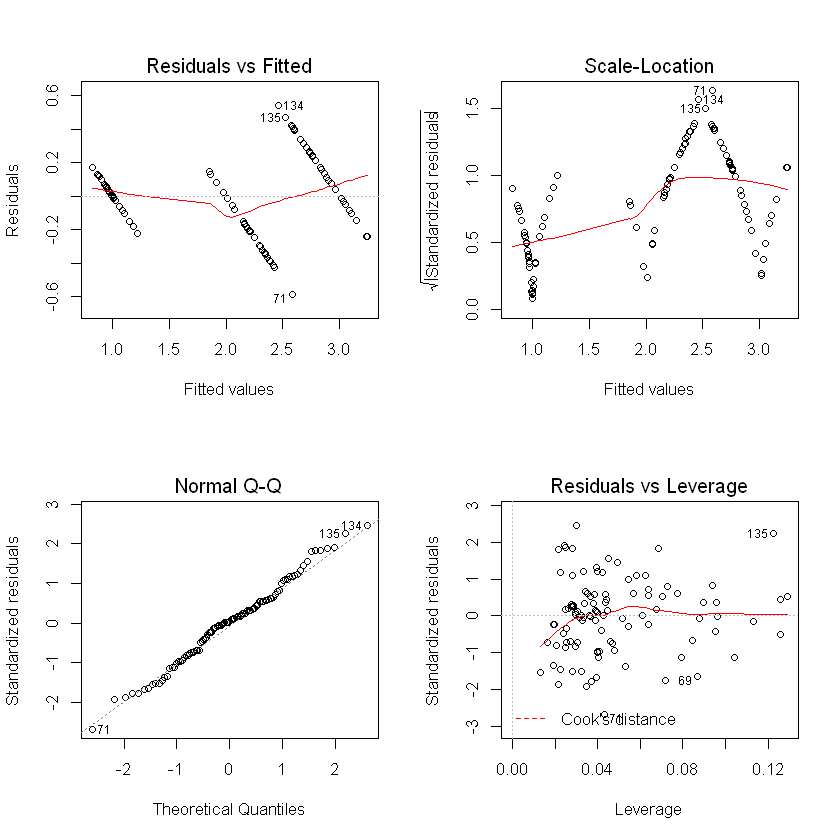

In [204]:
#Plot model characterstics
layout(matrix(1:4,2,2))
plot(lm_model) 

The interpretation of above plot is defined in the [article](http://www.montefiore.ulg.ac.be/~kvansteen/GBIO0009-1/ac20092010/Class8/Using%20R%20for%20linear%20regression.pdf)

* The plot in the upper left shows the residual errors plotted versus their fitted values. 
    
    The residuals should be randomly distributed around the horizontal line representing a
    residual error of zero; that is, there should not be a distinct trend in the distribution of
    points.  
    
    

* The plot in the lower left is a standard Q-Q plot, which should suggest that the residual errors are normally distributed. 


* The scale-location plot in the upper right shows the square root of the standardized residuals (sort of a square root of relative error) as a function of the fitted values. Again, there should be no obvious trend in this plot.


* Finally, the plot in the lower right shows each points leverage, which is a measure of its importance in determining the regression result.

    Superimposed on the plot are contour lines for the Cook’s distance, which is another measure of the importance of each
    observation to the regression. Smaller distances means that removing the observation has
    little affect on the regression results. Distances larger than 1 are suspicious and suggest
    the presence of a possible outlier or a poor model. 

## 3. Fit Lasso Model

In [173]:
#train Lasso model
glm_lassomodel <- glmnet(as.matrix(train_features),train_output,alpha=1,family='gaussian')

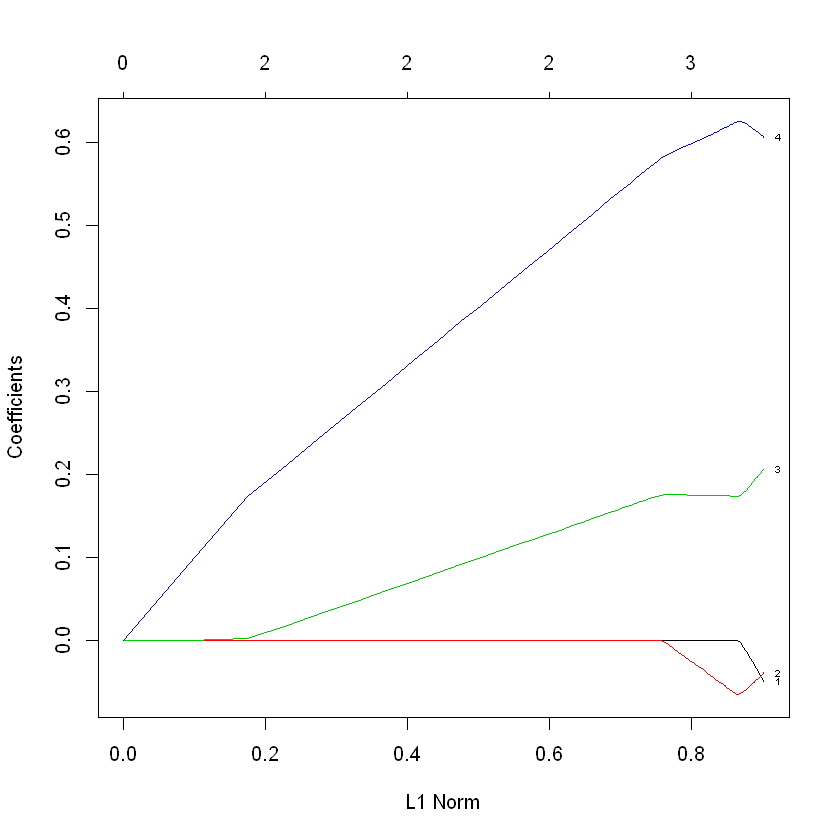

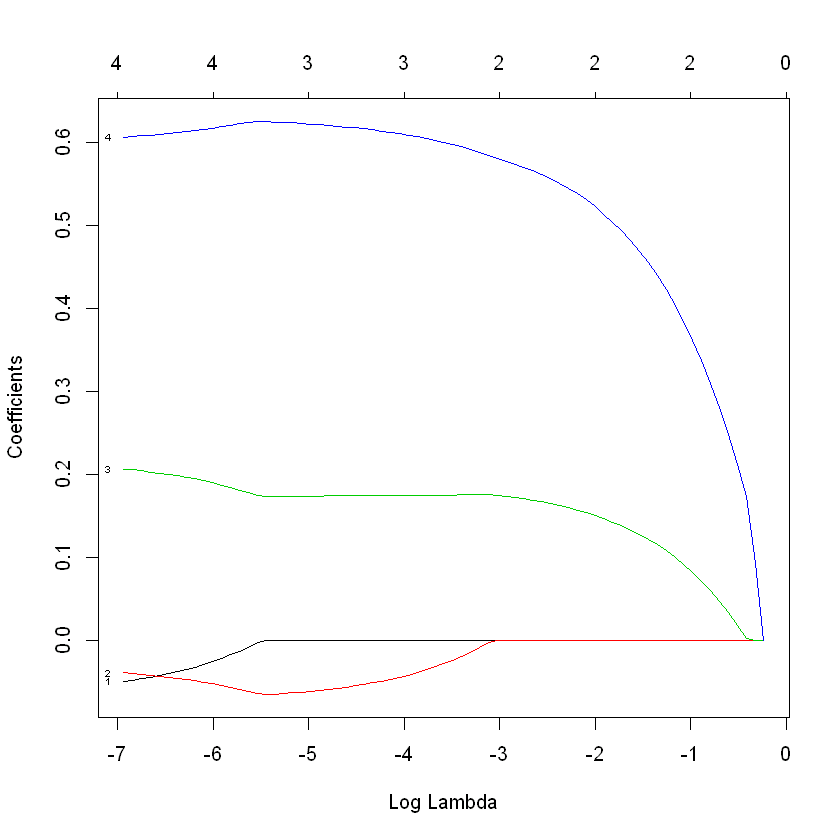

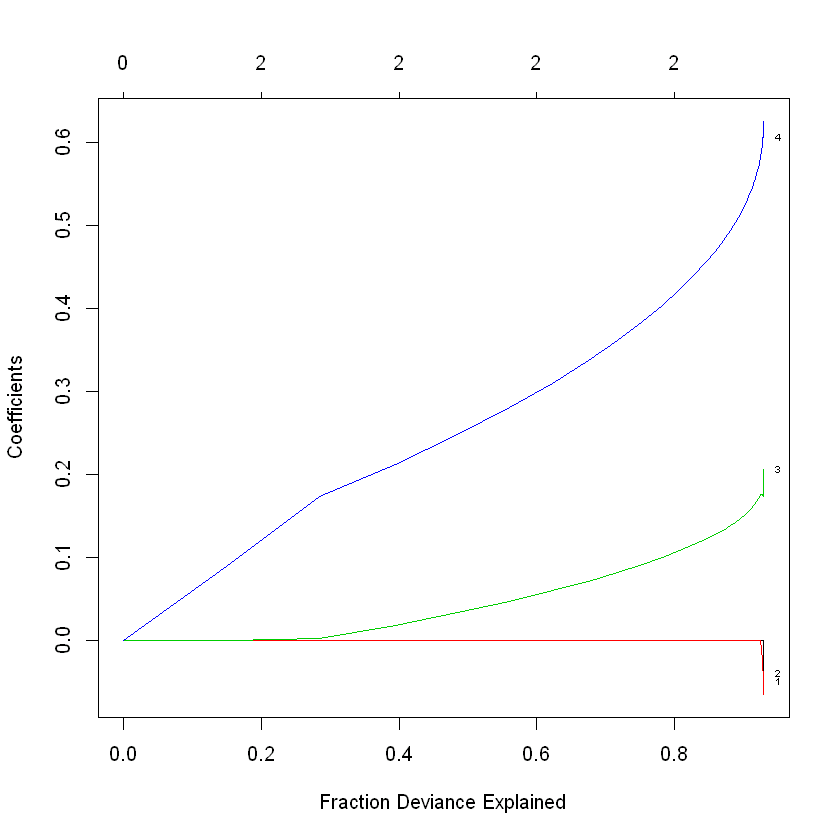

In [174]:
#plot variable coefficients vs. shrinkage parameter lambda.
plot(glm_lassomodel,label=TRUE)
plot(glm_lassomodel, xvar = "lambda", label = TRUE)
plot(glm_lassomodel, xvar = "dev", label = TRUE)

For interpretation of above charts please see this [article](http://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html#qs)

In [191]:
# best lambda from model fit
best_lassolambda <- min(glm_lassomodel$lambda)
paste("Best Lambda from Lasso Model:" , best_lassolambda)

[1] "Best Lambda from Lasso Model: 0.000975655480496421"

### Try Cross Validation on Lasso

In [176]:
#train Cross validated Lasso model
glm_cvlassomodel <- cv.glmnet(as.matrix(train_features),train_output,alpha=1,family='gaussian')

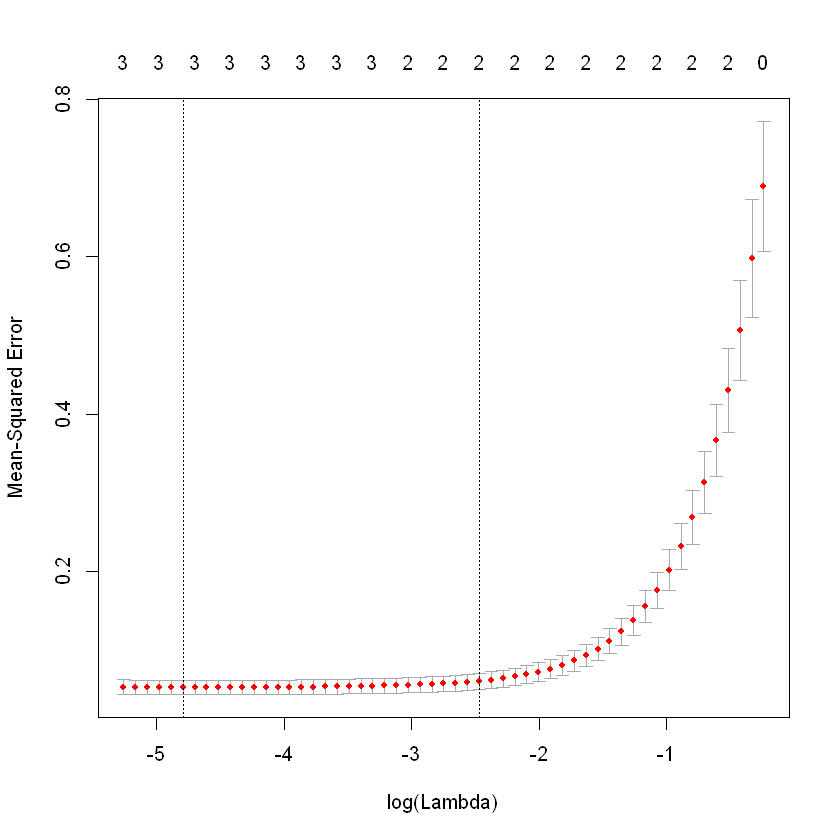

In [177]:
plot(glm_cvlassomodel)

In [178]:
best_cvlassolambda <- min(glm_cvlassomodel$lambda)
paste("Best Lambda from Lasso Model with Cross Valdiation:" , best_cvlassolambda)

[1] "Best Lambda from Lasso Model with Cross Valdiation: 0.00520677985268748"

## Fit Ridge Model

In [179]:
#train Ridge model
glm_ridgemodel <- glmnet(as.matrix(train_features),train_output,alpha=0,family='gaussian')

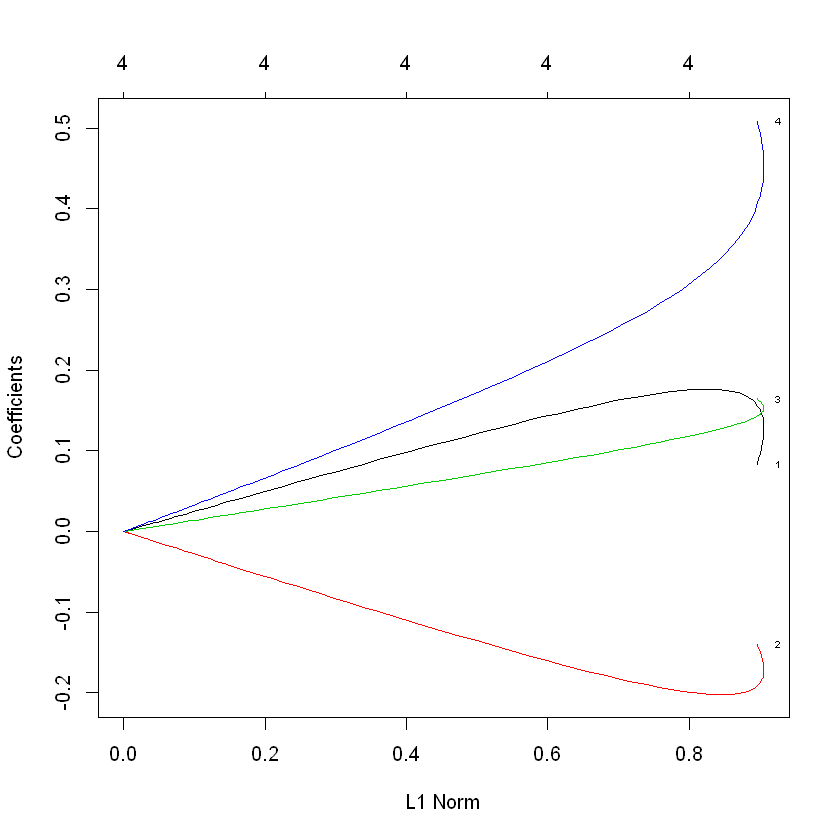

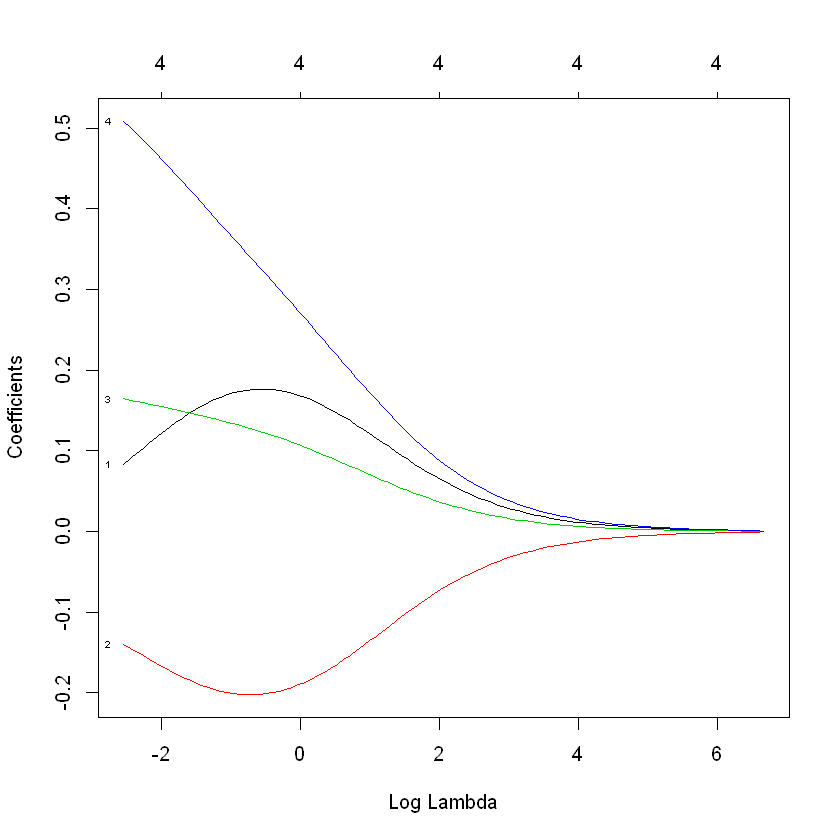

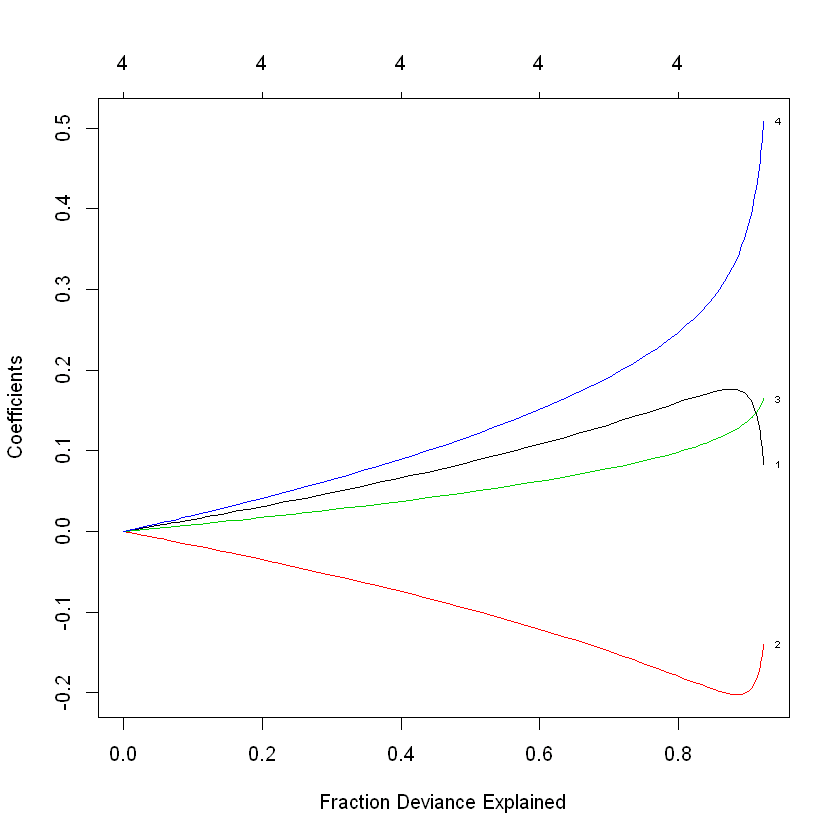

In [180]:
#plot variable coefficients vs. shrinkage parameter lambda.
plot(glm_ridgemodel,label=TRUE)
plot(glm_ridgemodel, xvar = "lambda", label = TRUE)
plot(glm_ridgemodel, xvar = "dev", label = TRUE)

In [181]:
# best lambda from model fit
best_ridgelambda <- min(glm_ridgemodel$lambda)
paste("Best Lambda from Ridge Model:" , best_ridgelambda)

[1] "Best Lambda from Ridge Model: 0.0791384240459574"

### Try Cross Validation on Ridge

In [182]:
#train Cross validated Lasso model
glm_cvridgemodel <- cv.glmnet(as.matrix(train_features),train_output,alpha=0,family='gaussian')

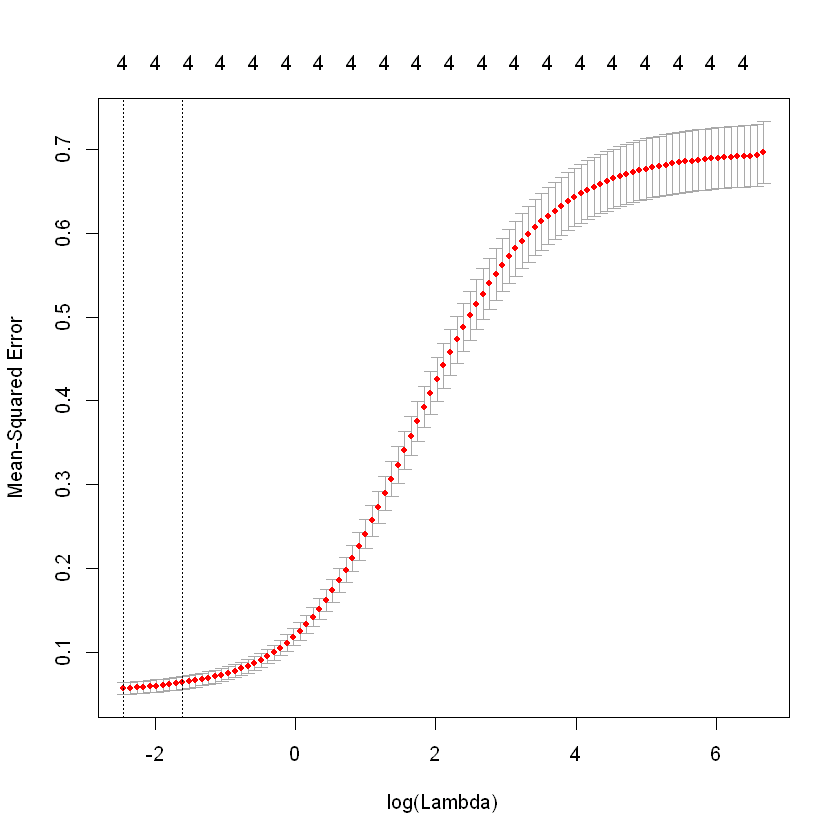

In [183]:
plot(glm_cvridgemodel)

In [184]:
best_cvridgelambda <- min(glm_cvridgemodel$lambda)
paste("Best Lambda from Ridge Model with Cross Valdiation:" , best_cvridgelambda)

[1] "Best Lambda from Ridge Model with Cross Valdiation: 0.0868543226935042"

## Fit ElastiNet Model

In [185]:
#train Elastinet model (alpha=0.5)
glm_elastinetmodel <- glmnet(as.matrix(train_features),train_output,alpha=0.5,family='gaussian')

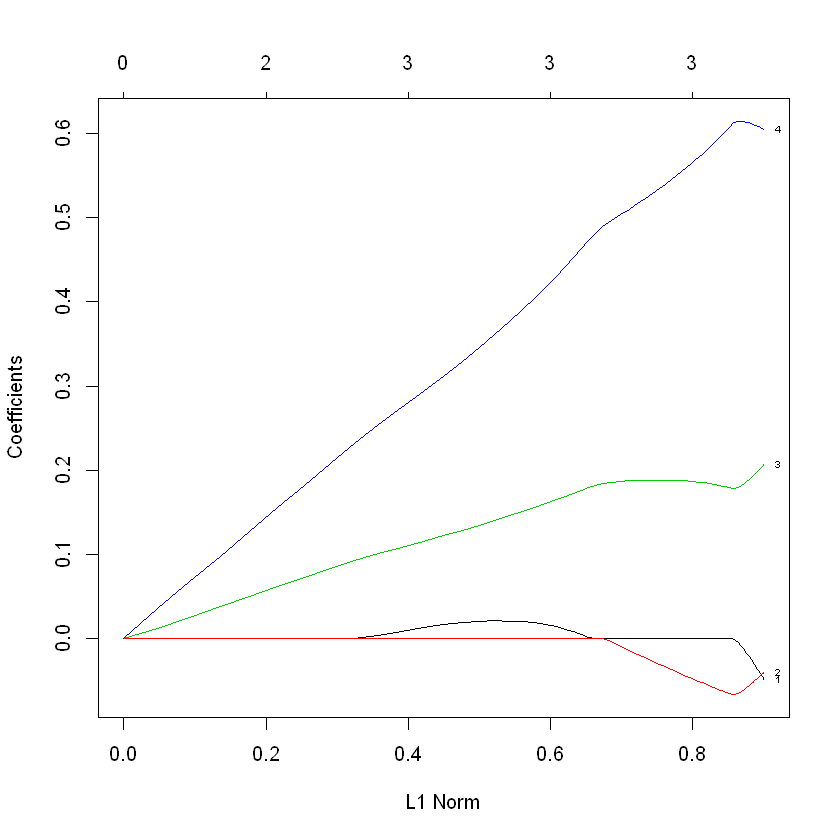

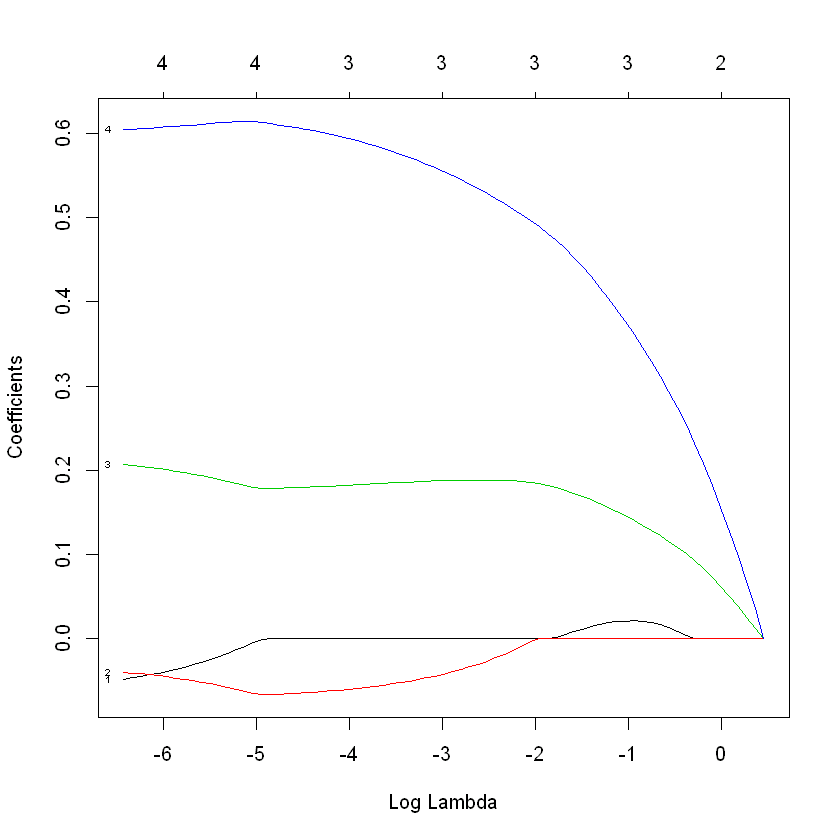

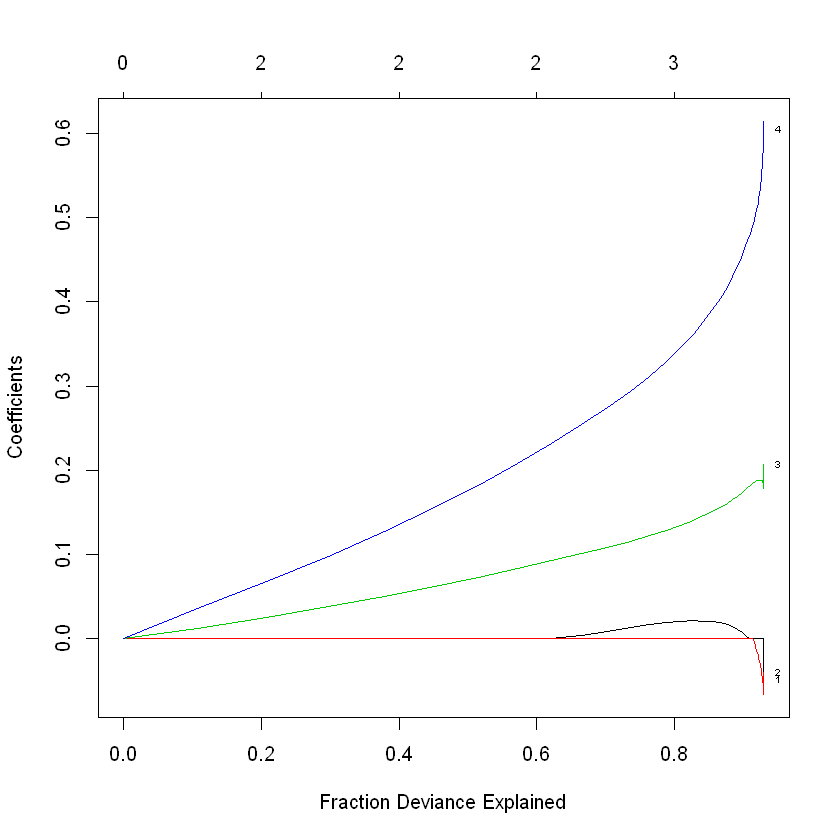

In [186]:
#plot variable coefficients vs. shrinkage parameter lambda.
plot(glm_elastinetmodel,label=TRUE)
plot(glm_elastinetmodel, xvar = "lambda", label = TRUE)
plot(glm_elastinetmodel, xvar = "dev", label = TRUE)

In [187]:
# best lambda from model fit
best_elastinetlambda <- min(glm_elastinetmodel$lambda)
paste("Best Lambda from ElastiNet Model:" , best_elastinetlambda)

[1] "Best Lambda from ElastiNet Model: 0.00162001264070474"

### Try Cross Validation on Elastinet

In [193]:
#train Cross validated ElastiNet model
glm_cvelastinetmodel <- cv.glmnet(as.matrix(train_features),train_output,alpha=0.5,family='gaussian')

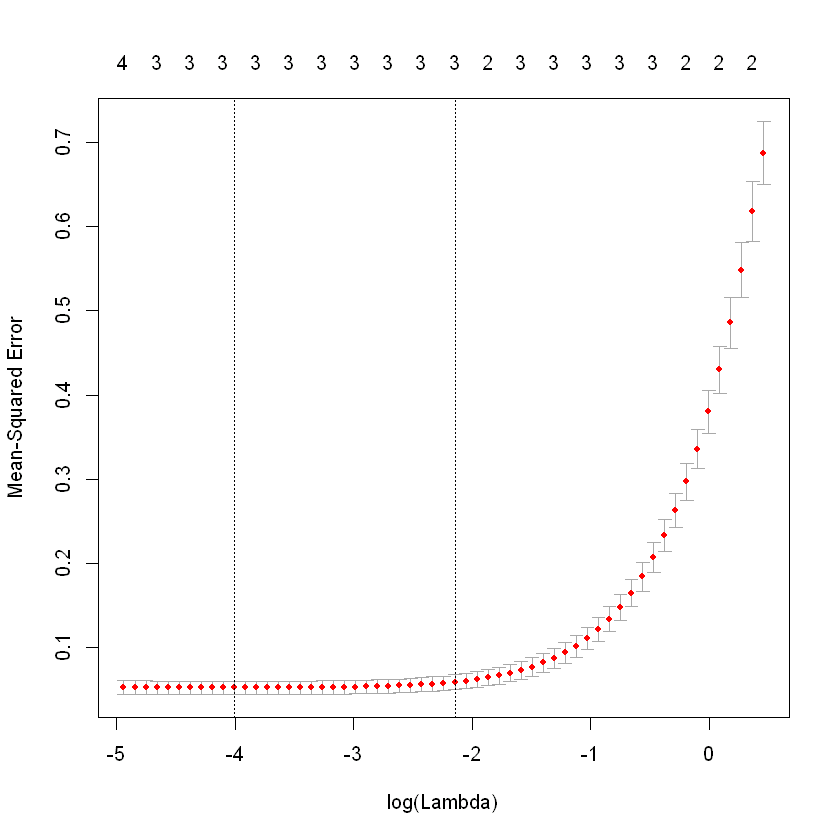

In [194]:
plot(glm_cvelastinetmodel)

In [195]:
best_cvelastinetlambda <- min(glm_cvelastinetmodel$lambda)
paste("Best Lambda from Elastinet Model with Cross Valdiation:" , best_cvelastinetlambda)

[1] "Best Lambda from Elastinet Model with Cross Valdiation: 0.00717766276746357"

## Comparing Lambdas
The Best lambdas the model has detected in each model variation

In [196]:
#Lasso Model
paste("Best Lambda from Lasso Model:" , best_lassolambda)
paste("Best Lambda from Lasso Model with Cross Valdiation:" , best_cvlassolambda)
##Ridge Model
paste("Best Lambda from Ridge Model:" , best_ridgelambda)
paste("Best Lambda from Ridge Model with Cross Valdiation:" , best_cvridgelambda)
#ElastiNet Model
paste("Best Lambda from ElastiNet Model:" , best_elastinetlambda)
paste("Best Lambda from Elastinet Model with Cross Valdiation:" , best_cvelastinetlambda)

[1] "Best Lambda from Lasso Model: 0.000975655480496421"

[1] "Best Lambda from Lasso Model with Cross Valdiation: 0.00520677985268748"

[1] "Best Lambda from Ridge Model: 0.0791384240459574"

[1] "Best Lambda from Ridge Model with Cross Valdiation: 0.0868543226935042"

[1] "Best Lambda from ElastiNet Model: 0.00162001264070474"

[1] "Best Lambda from Elastinet Model with Cross Valdiation: 0.00717766276746357"

## Comparing Models

### Predict Outputs by each model

In [236]:
#OLS Model Predictions
lm_predicts <- predict(lm_model,test_features)

#Encode to classes
lm_labels<-ifelse(lm_predicts <=1.5,1,ifelse(lm_predicts >1.5 & lm_predicts <=2.5,2,3))

table(sapply(lm_labels, FUN=as.factor))


 1  2  3 
12 16 17 

In [242]:
#Lasso Model Predictions
glm_lassopredicts <-predict(glm_lassomodel,newx=as.matrix(test_features),s= 0.000975655480496421)
glm_cvlassopredicts <-predict(glm_cvlassomodel,newx=as.matrix(test_features))


#Encode to classes
glm_lassolabels<-ifelse(glm_lassopredicts <=1.5,1,ifelse(glm_lassopredicts >1.5 & glm_lassopredicts <=2.5,2,3))
glm_cvlassolabels<-ifelse(glm_cvlassopredicts <=1.5,1,ifelse(glm_cvlassopredicts >1.5 & glm_cvlassopredicts <=2.5,2,3))

table(sapply(glm_lassolabels, FUN=as.factor))
table(sapply(glm_cvlassolabels, FUN=as.factor))


 1  2  3 
12 16 17 


 1  2  3 
12 19 14 

In [243]:
#Ridge Model Predictions
glm_ridgepredicts <-predict(glm_ridgemodel,newx=as.matrix(test_features),s=best_ridgelambda)
glm_cvridgepredicts <-predict(glm_cvridgemodel,newx=as.matrix(test_features))

#Encode to classes
glm_ridgelabels<-ifelse(glm_ridgepredicts <=1.5,1,ifelse(glm_ridgepredicts >1.5 & glm_ridgepredicts <=2.5,2,3))
glm_cvridgelabels<-ifelse(glm_cvridgepredicts <=1.5,1,ifelse(glm_cvridgepredicts >1.5 & glm_cvridgepredicts <=2.5,2,3))

table(sapply(glm_ridgelabels, FUN=as.factor))
table(sapply(glm_cvridgelabels, FUN=as.factor))


 1  2  3 
12 18 15 


 1  2  3 
12 18 15 

In [244]:
#ElastiNet Model Predictions
glm_elastinetpredicts <-predict(glm_elastinetmodel,newx=as.matrix(test_features),s=best_elastinetlambda)
glm_cvelastinetpredicts <-predict(glm_cvelastinetmodel,newx=as.matrix(test_features))

#Encode to classes
glm_elastinetlabels<-ifelse(glm_elastinetpredicts <=1.5,1,ifelse(glm_elastinetpredicts >1.5 & glm_elastinetpredicts <=2.5,2,3))
glm_cvelastinetlabels<-ifelse(glm_cvelastinetpredicts <=1.5,1,ifelse(glm_cvelastinetpredicts >1.5 & glm_cvelastinetpredicts <=2.5,2,3))

table(sapply(glm_elastinetlabels, FUN=as.factor))
table(sapply(glm_cvelastinetlabels, FUN=as.factor))


 1  2  3 
12 16 17 


 1  2  3 
12 19 14 

### Confusion Matrices

In [245]:
#For OLS Model
table(lm_labels,test_output)

         test_output
lm_labels  1  2  3
        1 12  0  0
        2  0 15  1
        3  0  2 15

In [246]:
#For Lasso Models
table(glm_lassolabels,test_output)
table(glm_cvlassolabels,test_output)

               test_output
glm_lassolabels  1  2  3
              1 12  0  0
              2  0 15  1
              3  0  2 15

                 test_output
glm_cvlassolabels  1  2  3
                1 12  0  0
                2  0 17  2
                3  0  0 14

In [247]:
#For Ridge Models
table(glm_ridgelabels,test_output)
table(glm_cvridgelabels,test_output)

               test_output
glm_ridgelabels  1  2  3
              1 12  0  0
              2  0 16  2
              3  0  1 14

                 test_output
glm_cvridgelabels  1  2  3
                1 12  0  0
                2  0 16  2
                3  0  1 14

In [248]:
#For ElastiNet Models
table(glm_elastinetlabels,test_output)
table(glm_cvelastinetlabels,test_output)

                   test_output
glm_elastinetlabels  1  2  3
                  1 12  0  0
                  2  0 15  1
                  3  0  2 15

                     test_output
glm_cvelastinetlabels  1  2  3
                    1 12  0  0
                    2  0 17  2
                    3  0  0 14